In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = pd.read_csv('/content/appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [16]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


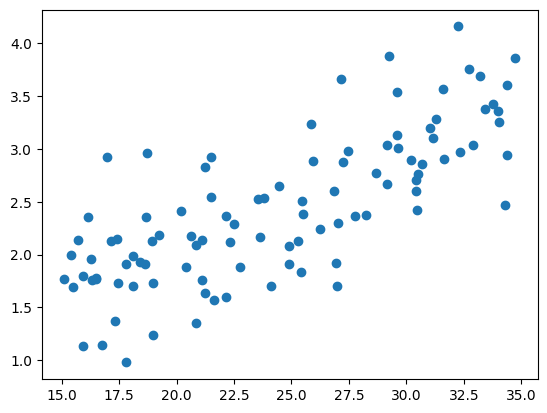

In [17]:
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.show()

In [18]:
print(df.isnull().sum())


Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [19]:
X = df[['Temperature (°C)']]
y = df['Energy Consumption (kWh)']

In [20]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df.corr()

,Temperature (°C),Energy Consumption (kWh)
Temperature (°C),1.000000,0.759292
Energy Consumption (kWh),0.759292,1.000000


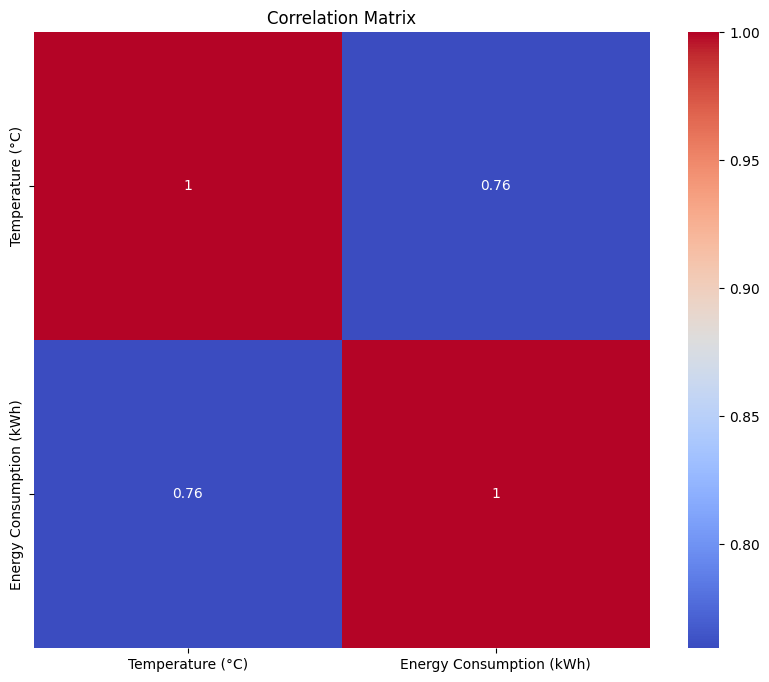

In [22]:
import seaborn as sns

def create_correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

create_correlation_matrix(df)

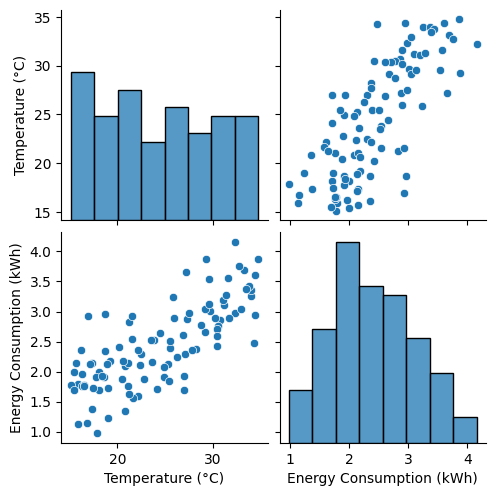

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Slope: ", model.coef_)
print("y-intercept: ", model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907633


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.16342487842925055


In [33]:
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("linear_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
loaded_y_pred = loaded_model.predict(X_test)

In [34]:
import numpy as np

mse = mean_squared_error(y_test, loaded_y_pred)
mae = mean_absolute_error(y_test, loaded_y_pred)
r2 = r2_score(y_test, loaded_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.16342487842925055
Mean Absolute Error: 0.29567128895948885
R2 Score: 0.6119478445218713


In [27]:
import joblib
joblib.dump(model, 'appliance_energy_model.pkl')


['appliance_energy_model.pkl']

In [28]:
temp = np.array([[22.49]])

In [29]:
prediction = model.predict(temp)
print("Predicted energy consumption:", prediction)

Predicted energy consumption: [2.24530337]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
